In [280]:
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn.impute import KNNImputer

In [281]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [282]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [283]:
categorical = ["Survived", "Sex", "Embarked", "Cabin", "Name", "Ticket"]
numeric = ["Fare", "Age", "PassengerId", "Parch"]

In [284]:
x = train_df.dtypes

In [285]:
for e in x.keys():
  if train_df[e].isnull().any():
    print(e)

Age
Cabin
Embarked


In [286]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [287]:
def cat_des(column_name):
  return train_df[column_name].describe(include=[0])

In [288]:
cat_des("Sex")

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [289]:
cat_des("Embarked")

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [290]:
cat_des("Cabin")

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [291]:
cat_des("Name")

count                      891
unique                     891
top       Hosono, Mr. Masabumi
freq                         1
Name: Name, dtype: object

In [292]:
cat_des("Ticket")

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [293]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [294]:
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


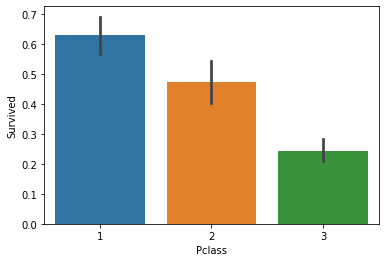

In [295]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

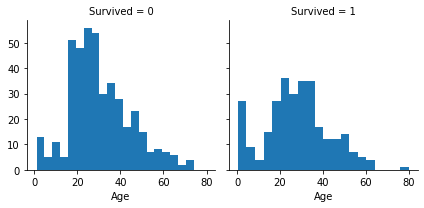

In [296]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

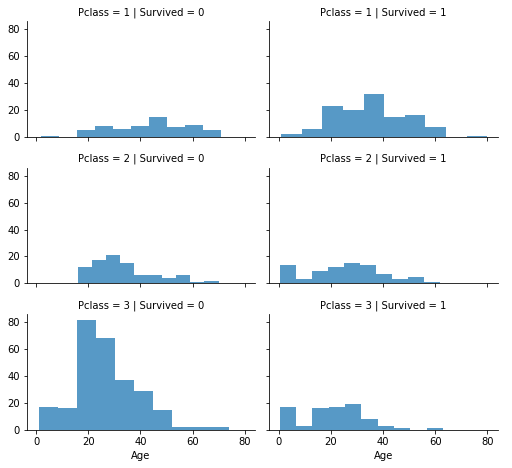

In [297]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.75, bins=10)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


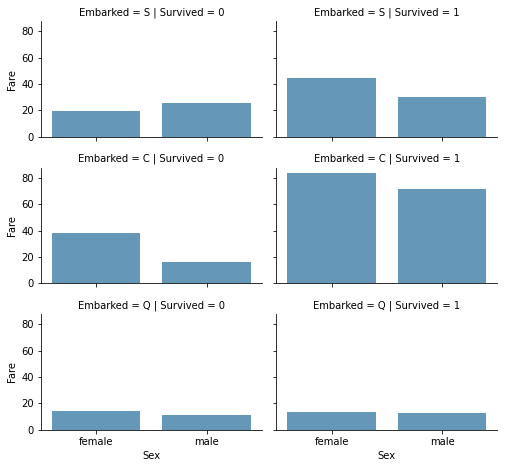

In [298]:
grid = sns.FacetGrid(train_df, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.75, ci=None)
grid.add_legend();

In [299]:
train_df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [300]:
train_df.Cabin.isna().sum()

687

In [301]:
train_df["Gender"] = train_df["Sex"].map({'female': 1, 'male': 0}).astype(int)
test_df["Gender"] = test_df["Sex"].map({'female': 1, 'male': 0}).astype(int)

In [302]:
train_df = train_df.drop(['Sex'], axis=1)
test_df = test_df.drop(['Sex'], axis=1)

In [303]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0


In [304]:
test_df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1


In [305]:
imputer = KNNImputer(n_neighbors=3)
train_df["Age"] = train_df["Age"].values.reshape(-1, 1)
train_df["Age"] = imputer.fit_transform(train_df["Age"].values.reshape(-1, 1))

In [306]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,NaN,Q,0


In [314]:
most_frequent_embark = train_df.Embarked.value_counts().idxmax()

In [308]:
train_df.Embarked = train_df.Embarked.fillna(most_frequent_embark)

In [309]:
train_df.Embarked.isna().any()

False

In [310]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [311]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [312]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3
train_df['Fare'] = train_df['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

In [315]:
train_df.head(6)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,3,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,1,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,3,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,1,NaN,S,0
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,1,NaN,Q,0
